In [1]:
!pip3 install image

import ResultsInspectors.ga_inspector as gai
import ResultsInspectors.bo_inspector as boi
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import image

from IPython import display
import pylab as pl
import numpy as np
import pandas as pd
import os

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind_from_stats
from statistics import mean
from statistics import stdev
import ast
from collections import defaultdict

accuracies = dict()
testbed = 'Testbed2/'
results_directory = 'Final Results (Random Initial State)/' + testbed


In [2]:
def GA_Plotter(directory_name, linestyle, color, plotDataPoints):
    maxs = []
    D = [0]*1000
    average_sens = 0
    results = gai.read_files(results_directory + directory_name)
    accuracies[directory_name] = []
    
    for run in results:
        run = run[0]

        data = []
        sensor_num = []
        for generation in run:
            for chromosome in generation:
                data.append(chromosome[0])
                sensor_num.append(chromosome[1])

        average_sens = average_sens + int(sensor_num[data.index(max(data))])                
        accuracies[directory_name].append(max(data))

        data = list(data)
        n_calls = len(data)
        iterations = range(1, n_calls + 1)
        data = [np.max(data[:i]) for i in iterations]
        
        maxs.append(max(data))

        D = [d1 + d2 for d1, d2 in zip(D,data)]

    D = [d / len(results) for d in D]
    gai.plot_convergence(D, 
                         plotDataPoints = False, 
                         color = color, 
                         ls = linestyle, 
                         xlabel="Black-box function query #",
                         ylabel='$F^1$'
                         + '\nnumber of motion sensors placed: ' + str(average_sens / 5))
    
    print('\t' + directory_name + 'performance: ' + str(np.mean(maxs)) + ' $\pm$ ' + str(np.std(maxs)))

    
def GA_Plotter_single(directory_name, linestyle, color, plotDataPoints):
    results = gai.read_files(results_directory + directory_name)
    average_sens = 0
    maxs = []
    
    for run in results:
        run = run[0]
        data = []
        sensor_num = []
        
        for generation in run:
            for chromosome in generation:
                data.append(chromosome[0])
                sensor_num.append(chromosome[1])

        maxs.append(data)
                
        # average_sens = average_sens + int(sensor_num[data.index(max(data))])  
        
    run = results[maxs.index(max(maxs))]
    run = run[0]
    
    data = []
    sensor_num = []

    for generation in run:
        for chromosome in generation:
            data.append(chromosome[0])
        
    gai.plot_convergence(data, 
                         plotDataPoints = plotDataPoints, 
                         color = color, 
                         ls = linestyle, 
                         xlabel="Black-box function query #",
                         ylabel='$F^1$')
                         # name = '\nnumber of motion sensors placed: ' + str(average_sens / 5))
            
    print(average_sens / 5)

	G (5-0.5)performance: 59.052296017659174 $\pm$ 2.0027081412532675


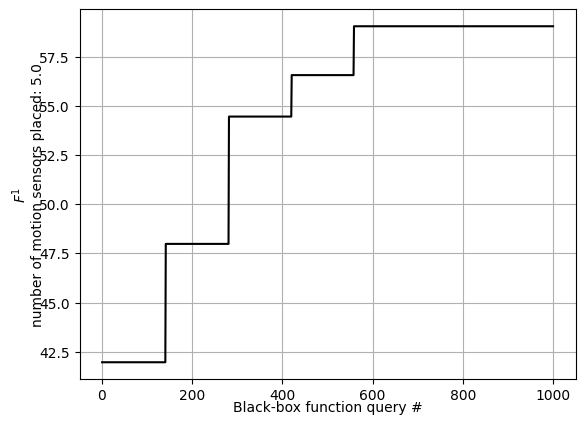

	G (7-0.5)performance: 59.87999466909802 $\pm$ 2.750893173355678


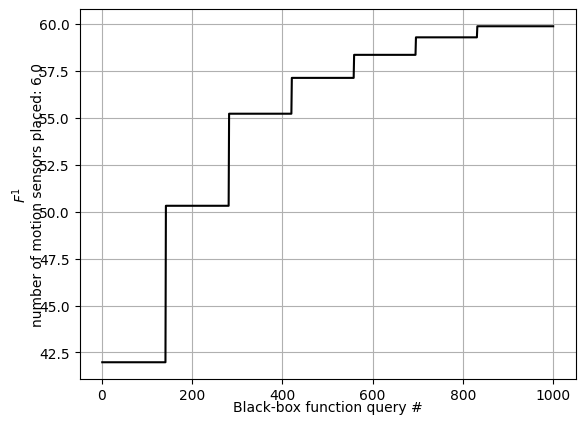

Data not available for  G (9-0.5)
Data not available for  G (11-0.5)
Data not available for  G (13-0.5)
Data not available for  G (15-0.5)
	G (5-1)performance: 56.53621096274459 $\pm$ 3.8586778021528843


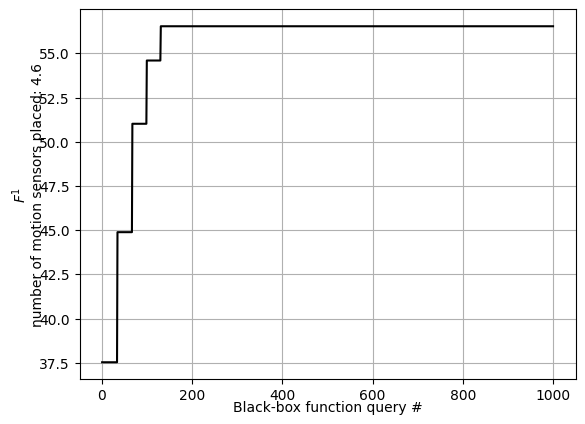

	G (7-1)performance: 59.51426681800041 $\pm$ 1.748694771459966


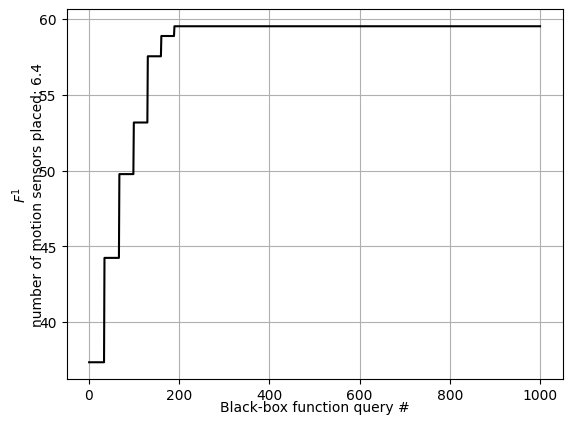

	G (9-1)performance: 62.360273574763426 $\pm$ 1.7359586552232855


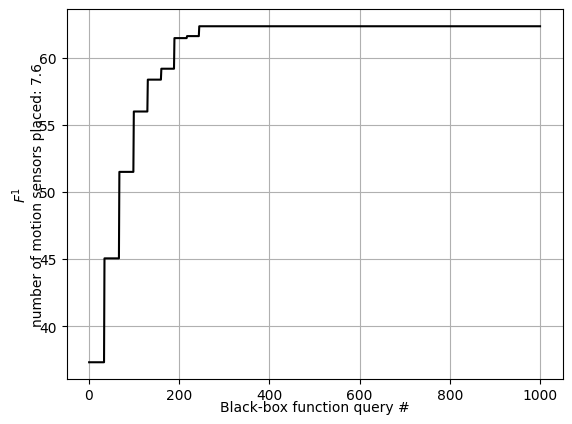

	G (11-1)performance: 63.726663625384546 $\pm$ 1.761830747002827


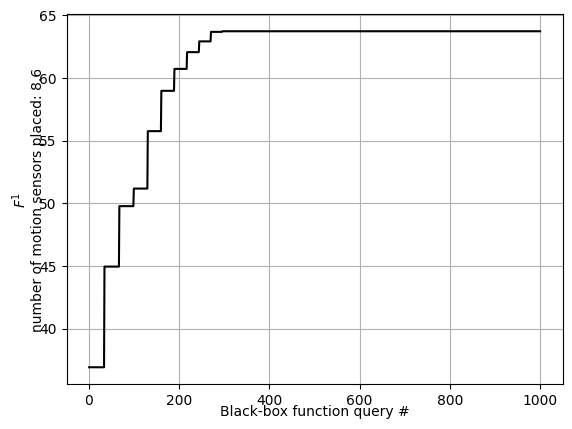

	G (13-1)performance: 65.15920012790755 $\pm$ 0.8939649265364982


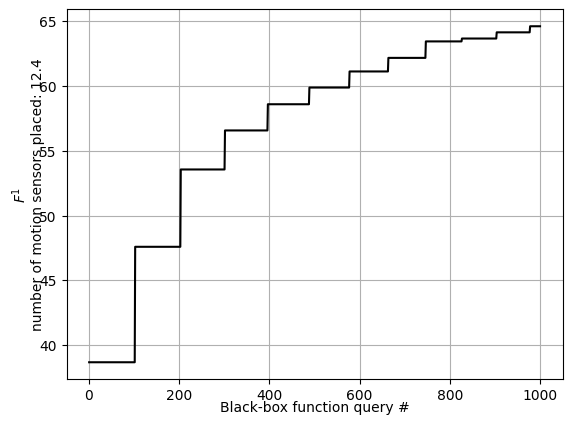

	G (15-1)performance: 66.7960315893952 $\pm$ 1.3517418773960876


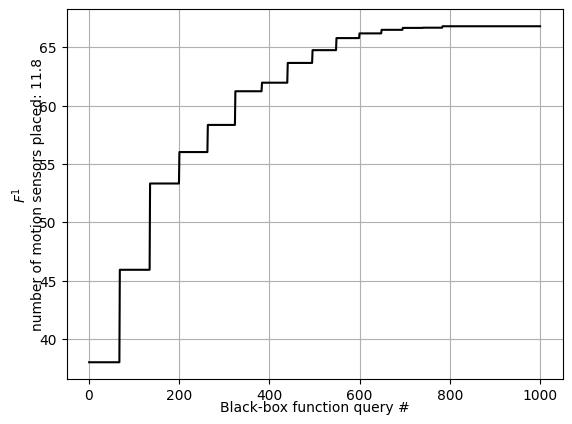

Data not available for  G (5-2)
	G (7-2)performance: 46.42899009937956 $\pm$ 2.6147376712050736


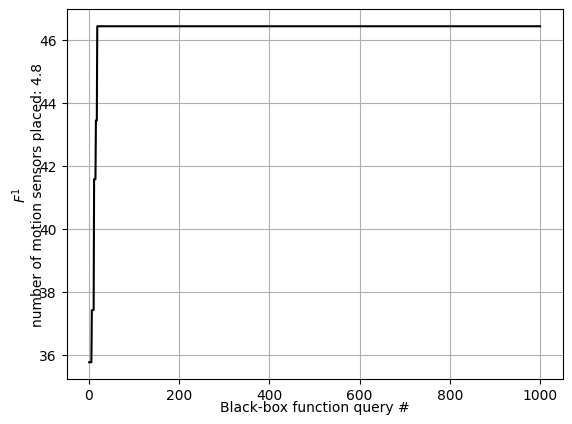

	G (9-2)performance: 46.21532039870958 $\pm$ 3.006099955115359


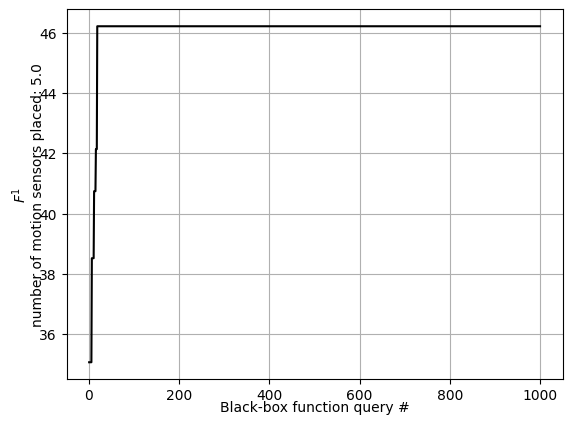

	G (11-2)performance: 54.10297545830904 $\pm$ 3.1043507522620057


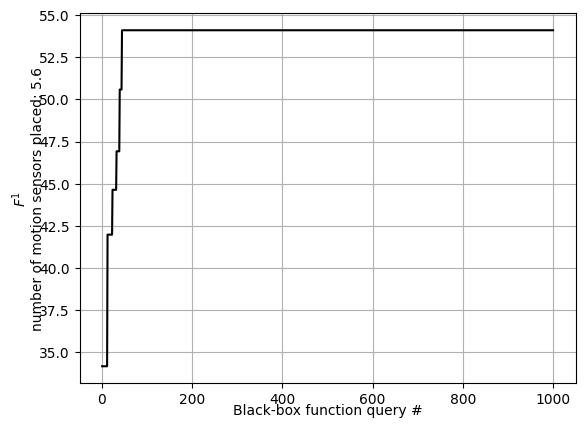

	G (13-2)performance: 56.74636683419503 $\pm$ 0.9293379778211901


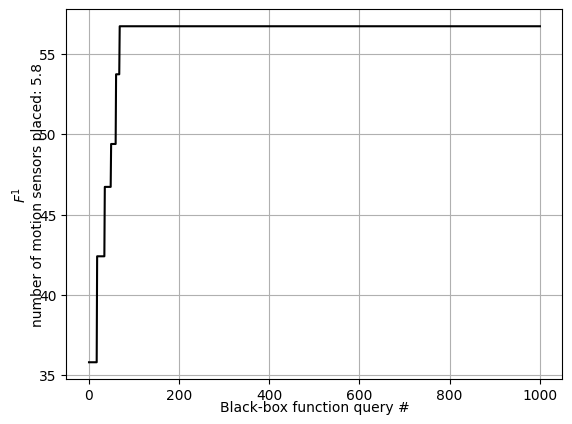

	G (15-2)performance: 49.849958955064 $\pm$ 4.716036629664285


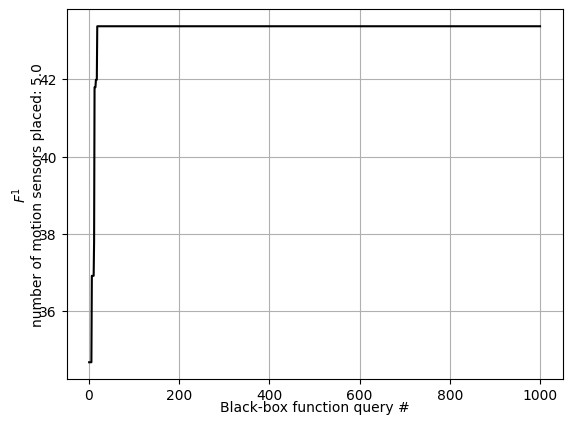

In [3]:
for e in [0.5, 1, 2]:
    for s in [5, 7, 9, 11, 13, 15]:
        dn1 = 'G (' + str(s) + '-' + str(e) + ')'
        try:
        
            GA_Plotter(dn1, linestyle = '-', color = 'k', plotDataPoints = True)
            plt.show()
            
        except:
            print('Data not available for ', dn1)

	GA (0.25)performance: 43.37981702273389 $\pm$ 0.963166179130757


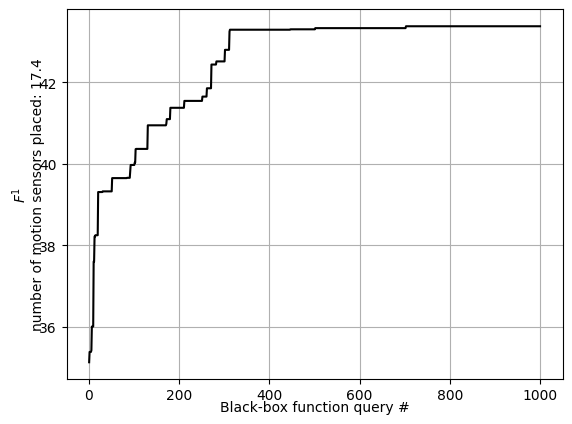

	GA (0.25)performance: 43.37981702273389 $\pm$ 0.963166179130757


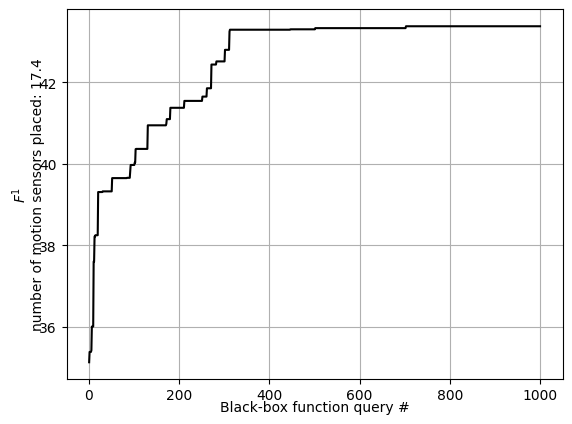

	GA (0.25)performance: 43.37981702273389 $\pm$ 0.963166179130757


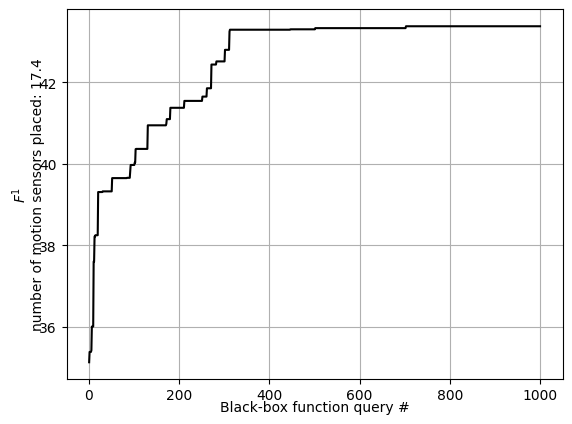

	GA (0.25)performance: 43.37981702273389 $\pm$ 0.963166179130757


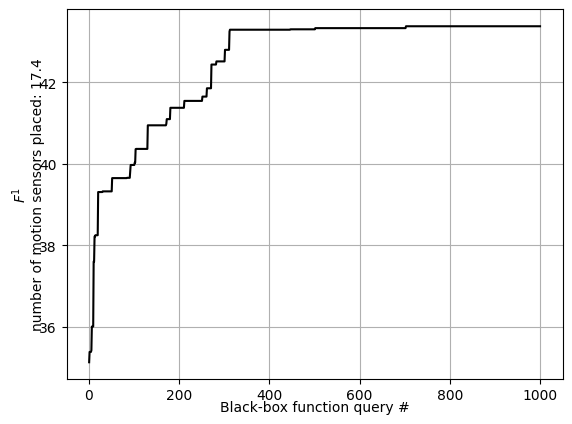

	GA (0.25)performance: 43.37981702273389 $\pm$ 0.963166179130757


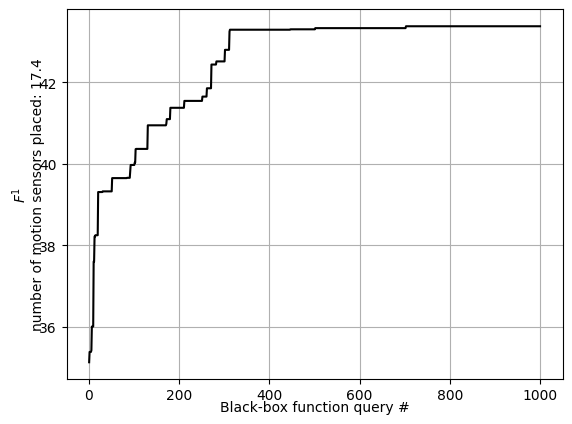

	GA (0.25)performance: 43.37981702273389 $\pm$ 0.963166179130757


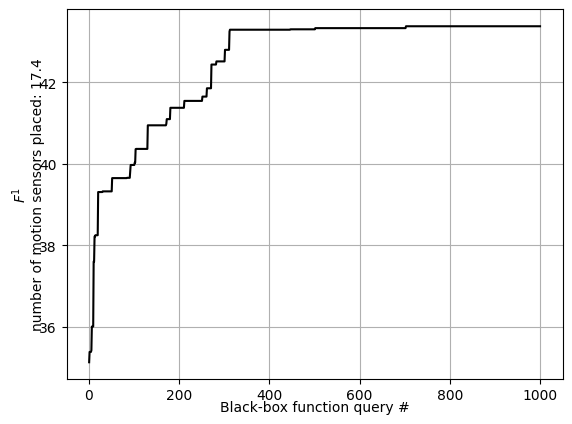

	GA (0.5)performance: 42.198894343670005 $\pm$ 1.409026768277074


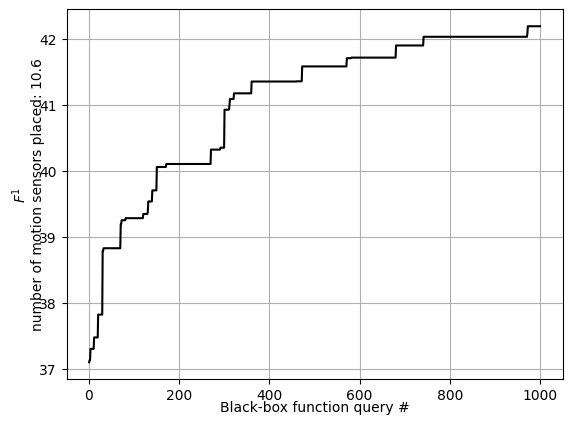

	GA (0.5)performance: 42.198894343670005 $\pm$ 1.409026768277074


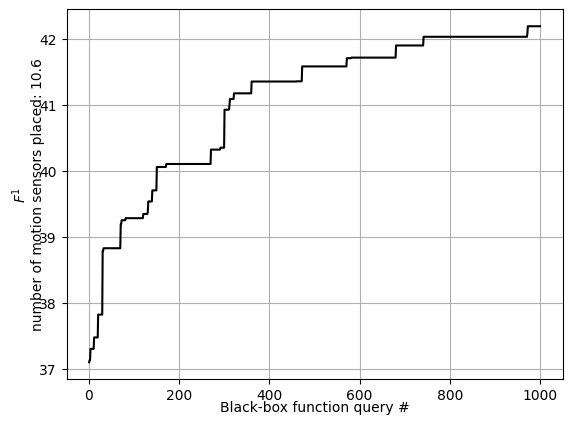

	GA (0.5)performance: 42.198894343670005 $\pm$ 1.409026768277074


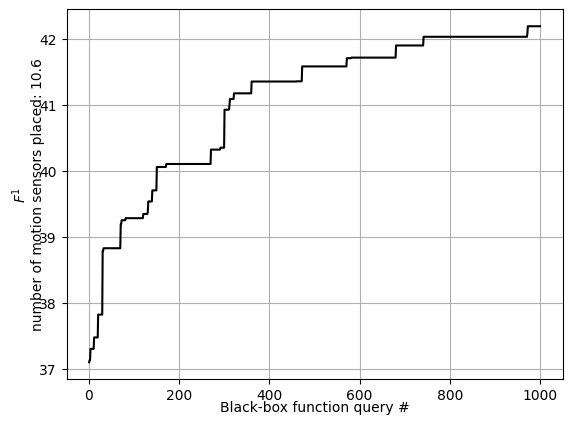

	GA (0.5)performance: 42.198894343670005 $\pm$ 1.409026768277074


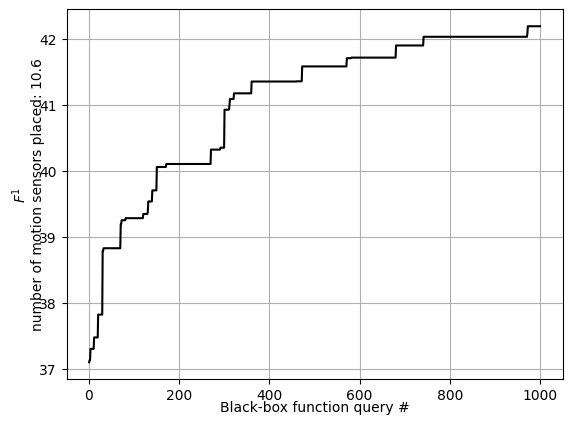

	GA (0.5)performance: 42.198894343670005 $\pm$ 1.409026768277074


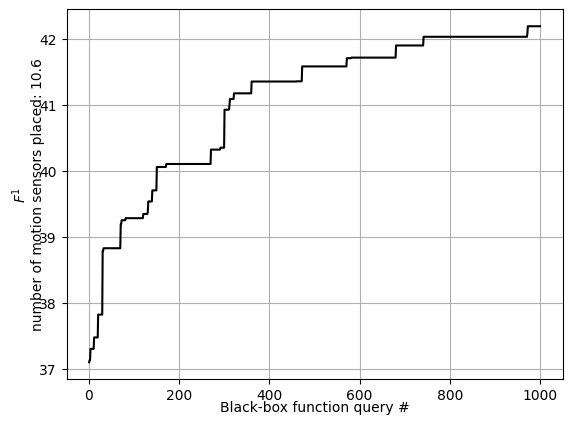

	GA (0.5)performance: 42.198894343670005 $\pm$ 1.409026768277074


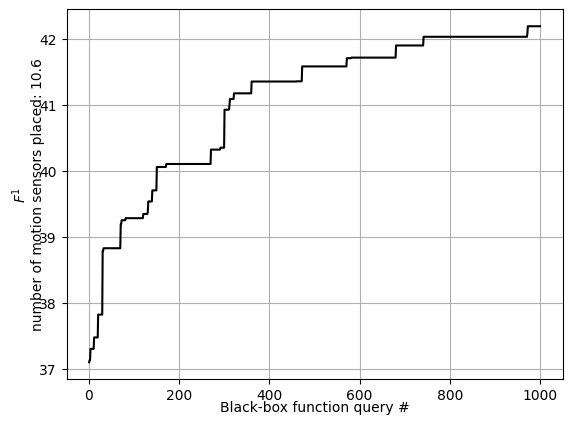

	GA (1)performance: 42.5867679034306 $\pm$ 0.7763729240441368


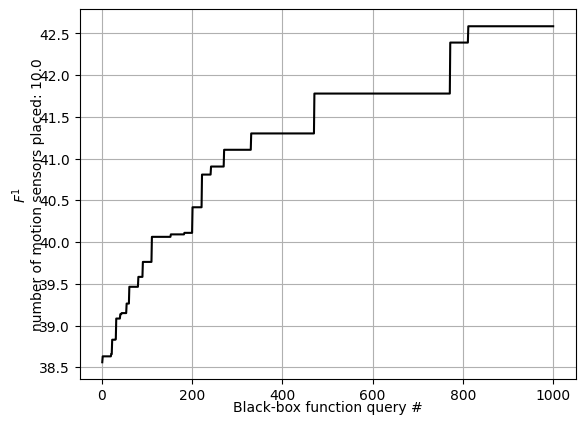

	GA (1)performance: 42.5867679034306 $\pm$ 0.7763729240441368


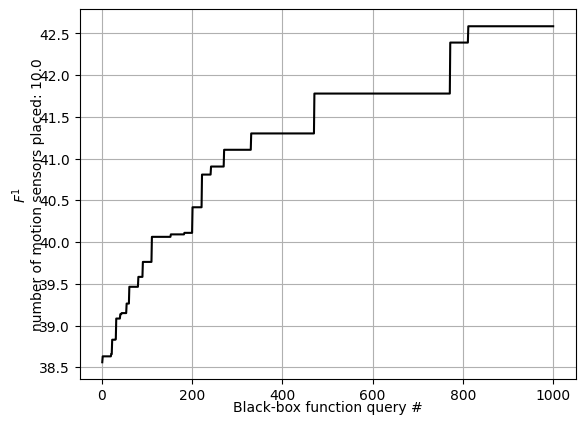

	GA (1)performance: 42.5867679034306 $\pm$ 0.7763729240441368


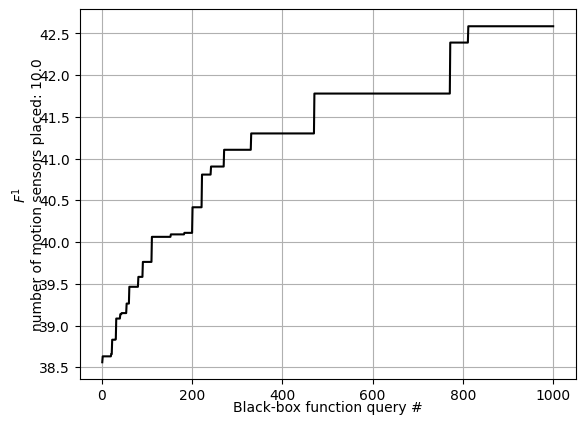

	GA (1)performance: 42.5867679034306 $\pm$ 0.7763729240441368


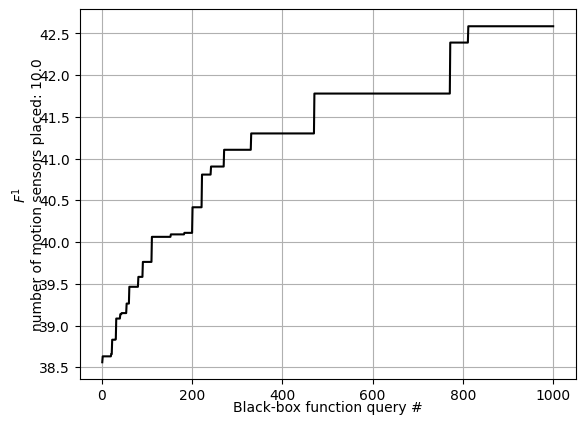

	GA (1)performance: 42.5867679034306 $\pm$ 0.7763729240441368


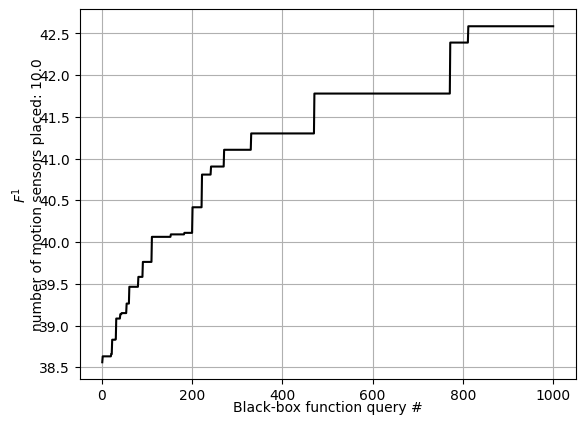

	GA (1)performance: 42.5867679034306 $\pm$ 0.7763729240441368


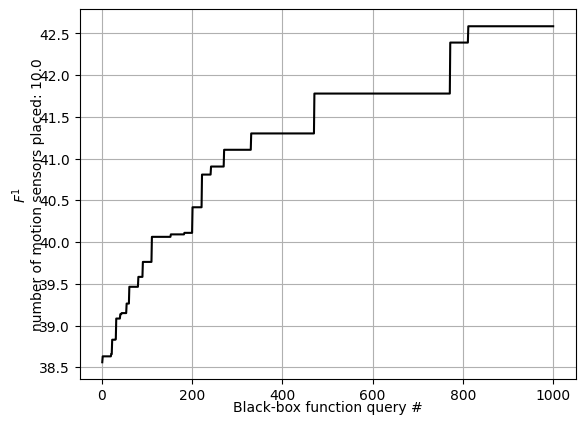

In [4]:
for e in [0.25, 0.5, 1]:
    for s in [5, 7, 9, 11, 13, 15]:
        dn1 = 'GA (' + str(e) + ')'
        try:
        
            GA_Plotter(dn1, linestyle = '-', color = 'k', plotDataPoints = True)
            plt.show()
            
        except:
            print('Data not available for ', dn1)

In [5]:
def BO_Plotter(directory_name, holdplot, name, e, linestyle, marker, color, plotDataPoints):
    maxs = []
    test = []
    D = [0]*1000
    results = boi.read_files(results_directory + directory_name)
    accuracies[directory_name] = []
    
    for index, result in enumerate(results):
        data = [100 - p for p in result.perfs]
        # data.sort()
        
        accuracies[directory_name].append(max(data))
        maxs.append(max(data))

        # data[0] = data[1]
        # if directory_name == 'BO (13-1)':
        #     print(accuracies[directory_name])
        

        # D = [d1 + d2 for d1, d2 in zip(D,data)]
        # D = [max(d1, d2) for d1, d2 in zip(D,data)]
        
        data = list(data)

        n_calls = len(data)
        iterations = range(1, n_calls + 1)
        data = [np.max(data[:i]) for i in iterations]
        
        D = [d1 + d2 for d1, d2 in zip(D,data)]
        
        
        # ax1 = boi.plot_convergence(data, plotDataPoints = False, name = name + ' : ' + 'Best Performance Found: ' + "{:.2f}".format(max(data)))
        
        if not holdplot:
            plt.show()
        
    D = [d / len(results) for d in D]
    ax1 = boi.plot_convergence(D, 
                               plotDataPoints = False, 
                               ls = linestyle, 
                               marker = marker,
                               color = color,
                               xlabel="Black-box function query #",
                               ylabel='$F^1$'
                               # name = 'the average performance of GA and BO for $\epsilon =$' + str(e))
                              )

    print('\t' + directory_name + 'performance: ' + str(np.mean(maxs)) + ' $\pm$ ' + str(np.std(maxs)))
    
    return ax1, sum(maxs) / 5
    
    
def BO_Plotter_best(directory_name, holdplot, name, e, linestyle, marker, color, plotDataPoints):
    results = boi.read_files(results_directory + directory_name)
    # accuracies[directory_name] = []
    maxs = []
    
    for index, result in enumerate(results):
        data = [100 - p for p in result.perfs]
        maxs.append(max(data))

    best_result = results[maxs.index(max(maxs))]
    data = [100 - p for p in best_result.perfs]

    # z = np.polyfit(range(1000), data, 1)
    # p = np.poly1d(z)

    

    ax1 = boi.plot_convergence(data, 
                               plotDataPoints = plotDataPoints, 
                               ls = linestyle, 
                               marker = marker,
                               color = color,
                               xlabel="Black-box function query #",
                               ylabel='$F^1$'
                               # name = 'the average performance of GA and BO for $\epsilon =$' + str(e))
                              )
    # plt.plot(range(1000), p(range(1000)))

    # plt.plot(range(19, 1000), mave)

    if not holdplot:
        plt.show()

    return ax1, sum(maxs) / 5

In [6]:
def Greedy_Plotter(directory_name, holdplot, name, e, linestyle, marker, color, plotDataPoints, data_range):
    maxs = []
    # test = []
    D = [0]*1000
    # results = boi.read_files(results_directory + directory_name)
    
    average_sens = 0
    results = gai.read_files(results_directory + directory_name)
    
    accuracies[directory_name] = []
    
    for run in results:
        run = run[0]

        data = []
        sensor_num = []
        for generation in run:
            for chromosome in generation:
                data.append(chromosome[0])
                sensor_num.append(chromosome[1])

        average_sens = average_sens + int(sensor_num[data.index(max(data))])                
        # accuracies[directory_name].append(max(data))

        data = list(data)
        n_calls = len(data)
        iterations = range(1, n_calls + 1)
        data = [np.max(data[:i]) for i in iterations]
        


        maxs.append(max(data[0:data_range]))

        accuracies[directory_name].append(max(data[0:data_range]))

        D = [d1 + d2 for d1, d2 in zip(D,data)]

    '''
    for index, result in enumerate(results):
        data = [100 - p for p in result.perfs]
        # data.sort()
        
        # data[0] = data[1]
        accuracies[directory_name].append(max(data))
        maxs.append(max(data))

        # D = [d1 + d2 for d1, d2 in zip(D,data)]
        # D = [max(d1, d2) for d1, d2 in zip(D,data)]
        
        data = list(data)

        n_calls = len(data)
        iterations = range(1, n_calls + 1)
        data = [np.max(data[:i]) for i in iterations]
        
        D = [d1 + d2 for d1, d2 in zip(D,data)]
        
        
        # ax1 = boi.plot_convergence(data, plotDataPoints = False, name = name + ' : ' + 'Best Performance Found: ' + "{:.2f}".format(max(data)))
        
        if not holdplot:
            plt.show()
    '''

    D = [d / len(results) for d in D]
    D = D[0:data_range]
    

    
    
    if len(D) < 1000:
        for i in range(data_range, 1000):
            D.append(D[data_range-1])
        
    

    ax1 = gai.plot_convergence(D, 
                               plotDataPoints = False, 
                               ls = linestyle, 
                               marker = marker,
                               color = color,
                               xlabel="Black-box function query #",
                               ylabel='$F^1$'
                               # name = 'the average performance of GA and BO for $\epsilon =$' + str(e))
                              )

    # print(maxs)
    print('\t' + directory_name + 'performance: ' + str(np.mean(maxs)) + ' $\pm$ ' + str(np.std(maxs)))
    
    return ax1, sum(maxs) / 5
    
    
def Greedy_Plotter_single(directory_name, holdplot, name, e, linestyle, marker, color, plotDataPoints, data_range):
    results = gai.read_files(results_directory + directory_name)
    average_sens = 0
    maxs = []
    
    for run in results:
        run = run[0]
        data = []
        sensor_num = []
        
        for generation in run:
            for chromosome in generation:
                data.append(chromosome[0])
                sensor_num.append(chromosome[1])

        maxs.append(data)
                
        # average_sens = average_sens + int(sensor_num[data.index(max(data))])  
        
    run = results[maxs.index(max(maxs))]
    run = run[0]
    
    data = []
    sensor_num = []

    for generation in run:
        for chromosome in generation:
            data.append(chromosome[0])
        
    data = data[0:data_range]
    
    # if len(data) < 1000:
    #     for i in range(data_range, 1000):
    #         data.append(data[data_range-1])
        
    gai.plot_convergence(data, 
                         plotDataPoints = plotDataPoints, 
                         color = color, 
                         ls = linestyle, 
                         xlabel="Black-box function query #",
                         ylabel='$F^1$')
                         # name = '\nnumber of motion sensors placed: ' + str(average_sens / 5))
            
    print(average_sens / 5)

	GA (0.25)performance: 43.37981702273389 $\pm$ 0.963166179130757
	BO (5-0.25)performance: 65.76103755904703 $\pm$ 1.1878876564537033
----- [Errno 2] No such file or directory: 'Final Results (Random Initial State)/Testbed2/G (5-0.25)'
	BO (7-0.25)performance: 67.08091745308073 $\pm$ 0.844394207851973
----- [Errno 2] No such file or directory: 'Final Results (Random Initial State)/Testbed2/G (7-0.25)'
	BO (9-0.25)performance: 69.13077212798608 $\pm$ 0.5180150327307359
----- [Errno 2] No such file or directory: 'Final Results (Random Initial State)/Testbed2/G (9-0.25)'
	BO (11-0.25)performance: 73.7533526560912 $\pm$ 2.1653008284832085
----- [Errno 2] No such file or directory: 'Final Results (Random Initial State)/Testbed2/G (11-0.25)'
	BO (13-0.25)performance: 68.46172182907836 $\pm$ 0.6106810063427865
----- [Errno 2] No such file or directory: 'Final Results (Random Initial State)/Testbed2/G (13-0.25)'
-----  Incompatible checksums (245856336 vs 0x37cdaa4 = (_choices_set, choices, cho

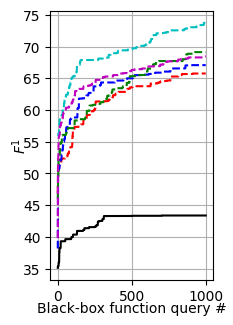

	GA (0.5)performance: 42.198894343670005 $\pm$ 1.409026768277074
	BO (5-0.5)performance: 64.9975541428699 $\pm$ 0.6633545167872694
	G (5-0.5)performance: 59.052296017659174 $\pm$ 2.0027081412532675
	BO (7-0.5)performance: 66.66834275860735 $\pm$ 0.6223206318253985
	G (7-0.5)performance: 59.87999466909802 $\pm$ 2.750893173355678
	BO (9-0.5)performance: 67.8312426197983 $\pm$ 1.0421706005851692
----- [Errno 2] No such file or directory: 'Final Results (Random Initial State)/Testbed2/G (9-0.5)'
	BO (11-0.5)performance: 68.4648147661964 $\pm$ 0.9600275432863206
----- [Errno 2] No such file or directory: 'Final Results (Random Initial State)/Testbed2/G (11-0.5)'
	BO (13-0.5)performance: 67.73624357676397 $\pm$ 1.0096532541817935
----- [Errno 2] No such file or directory: 'Final Results (Random Initial State)/Testbed2/G (13-0.5)'
	BO (15-0.5)performance: 67.31789395354588 $\pm$ 0.8315572286831672
----- [Errno 2] No such file or directory: 'Final Results (Random Initial State)/Testbed2/G (15-

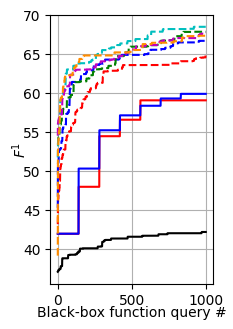

	GA (1)performance: 42.5867679034306 $\pm$ 0.7763729240441368
	BO (5-1)performance: 61.05419324927142 $\pm$ 0.8753941582217011
	G (5-1)performance: 56.53621096274459 $\pm$ 3.8586778021528843
	BO (7-1)performance: 63.41334074656369 $\pm$ 0.46178797516284725
	G (7-1)performance: 59.51426681800041 $\pm$ 1.748694771459966
	BO (9-1)performance: 64.5963028701025 $\pm$ 0.7699535494021799
	G (9-1)performance: 62.360273574763426 $\pm$ 1.7359586552232855
	BO (11-1)performance: 65.9550436717383 $\pm$ 1.1142097242025832
	G (11-1)performance: 63.726663625384546 $\pm$ 1.761830747002827
	BO (13-1)performance: 67.49601198202114 $\pm$ 1.15095351041768
	G (13-1)performance: 56.566861512473864 $\pm$ 1.2131747931415284
	BO (15-1)performance: 67.4496720348513 $\pm$ 0.9814017534802839
	G (15-1)performance: 61.96022960111361 $\pm$ 0.562838376314047


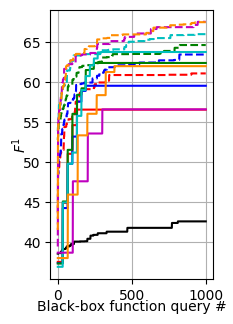

In [7]:
def frange(start, stop, step):
        steps = []
        while start < stop:
            steps.append(start)
            start +=step
        
        return steps

sensorNums = [5, 7, 9, 11, 13, 15]
epsilons = [0.25, 0.5, 1]

styles = [['', '--'],
           ['', ':'],
           ['', '-.'],
           ['o', '--'], 
           ['o', ':'],
           ['o', '-.']]
        
colors = ['r', 'b', 'g', 'c', 'm', 'darkorange']

for e in epsilons:
    index = 0
    BOnames = ['GA']
    fig, ax = plt.subplots(figsize=(2.1, 3.5))
    dn1 = 'GA (' + str(e) + ')'
    GA_Plotter(dn1, 
               linestyle = '-', 
               color = 'k',
               plotDataPoints = True)
    
    for index, sn in enumerate(sensorNums):
        dn2 = 'BO (' + str(sn) + '-' + str(e) + ')'
        dn3 = 'G (' + str(sn) + '-' + str(e) + ')'
        try:
            BO_Plotter(dn2, 
                        holdplot = True, 
                        plotDataPoints = True,
                        name = dn2, 
                        e = e,
                        linestyle = styles[0][1], 
                        marker = styles[0][0],
                        color = colors[index])

            BOnames.append('BO ' + str(sn))
        except Exception as err:
            print('----- ', err)
        
        try:
            if testbed == 'Testbed1/':
                placeHolders = []
                Xs = frange(e, 8, e)
                Ys = frange(e, 8, e)

                for x in Xs:
                    for y in Ys:
                        placeHolders.append([x, y])

            elif testbed == 'Testbed2/':
                placeHolders = []
                Xs = frange(e, 8, e)
                Ys = frange(e, 5.3, e)

                for x in Xs:
                    for y in Ys:
                        if x < 2 and y < 2:
                            continue
                        else:
                            placeHolders.append([x, y])


            S = len(placeHolders)
            # S = int(int((8 - e)*int(np.floor(np.ceil(5.2) - e))) / (e**2))

            placed_sn = min(S, sn)
            # print(int((S * placed_sn) - ((placed_sn * (placed_sn - 1)) / 2)))


            Greedy_Plotter(dn3,
                        holdplot = True, 
                        plotDataPoints = True,
                        name = dn2, 
                        e = e,
                        linestyle = styles[0][1], 
                        marker = styles[0][0],
                        color = colors[index],
                        data_range = int((S * placed_sn) - ((placed_sn * (placed_sn + 1)) / 2)))

            BOnames.append('Greedy ' + str(sn))

        except Exception as err:
            print('-----',  err)

        

        # plt.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

        # legend = plt.legend(BOnames, ncol=13, prop={'size': 9}, loc = 'center left', handlelength = 1.5, bbox_to_anchor=(1, 0.5))
        
        # legend.get_frame().set_alpha(None)
        # legend.get_frame().set_facecolor((0, 0, 0, 0.1))
    
    # plt.grid()
    plt.show()

G (5-0.25)
Data not available for  G (5-0.25)
G (7-0.25)
Data not available for  G (7-0.25)
G (9-0.25)
Data not available for  G (9-0.25)
G (11-0.25)
Data not available for  G (11-0.25)
G (13-0.25)
Data not available for  G (13-0.25)
G (15-0.25)
Data not available for  G (15-0.25)
G (5-0.5)
0.0


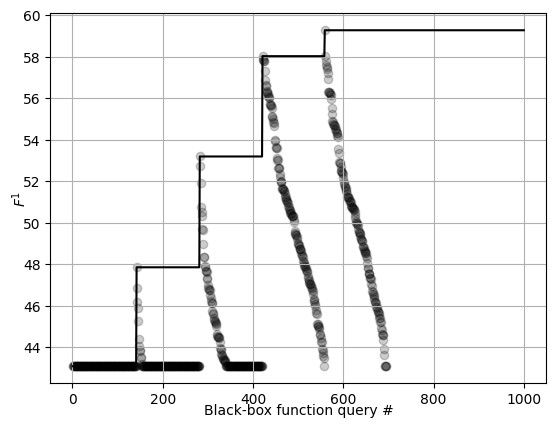

G (7-0.5)
0.0


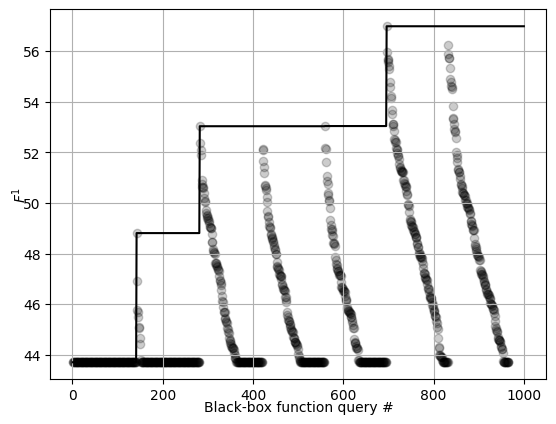

G (9-0.5)
Data not available for  G (9-0.5)
G (11-0.5)
Data not available for  G (11-0.5)
G (13-0.5)
Data not available for  G (13-0.5)
G (15-0.5)
Data not available for  G (15-0.5)
G (5-1)
0.0


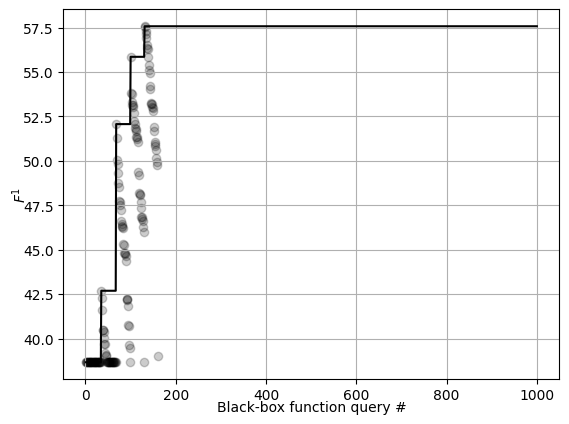

G (7-1)
0.0


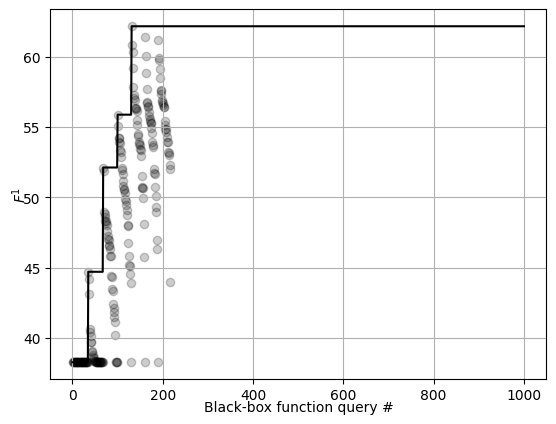

G (9-1)
0.0


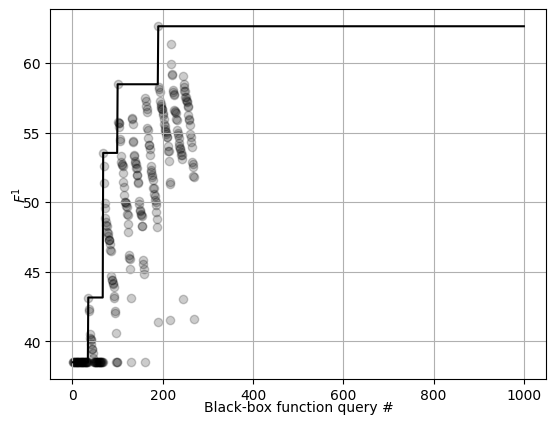

G (11-1)
0.0


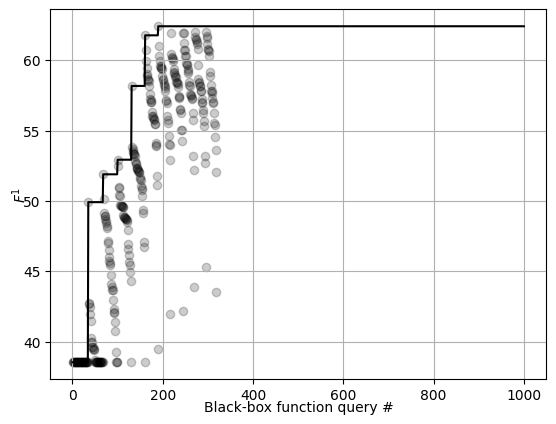

G (13-1)
0.0


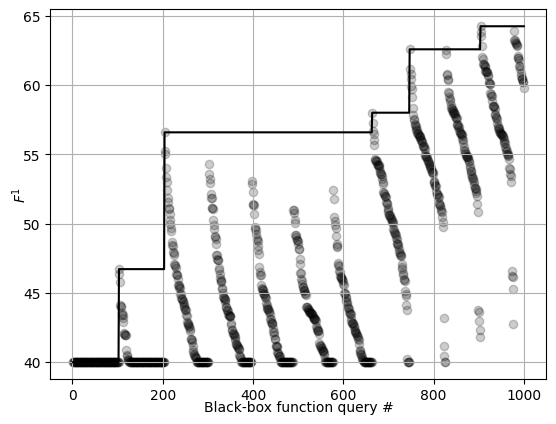

G (15-1)
0.0


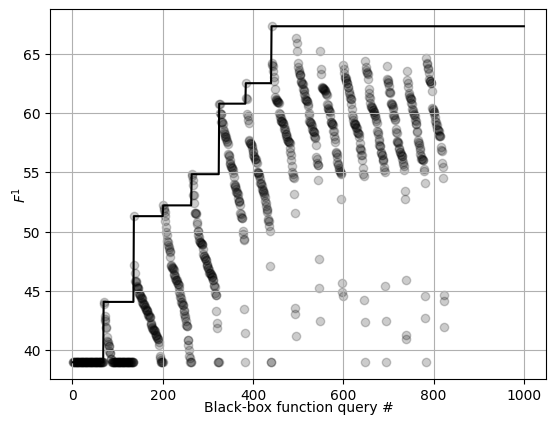

In [8]:
for e in [0.25, 0.5, 1]:
    for s in [5, 7, 9, 11, 13, 15]:

        dn1 = 'G (' + str(s) + '-' + str(e) + ')'

        try:
            print(dn1)
            Greedy_Plotter_single(dn1, 
                                  holdplot = False, 
                                  name = 'test', 
                                  e = e, 
                                  linestyle = '-', 
                                  color = 'k', 
                                  marker = '',
                                  plotDataPoints = True, 
                                  data_range = 1000)
            plt.show()
            
        except:
            print('Data not available for ', dn1)

0.0


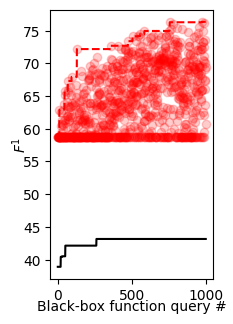

0.0
0.0


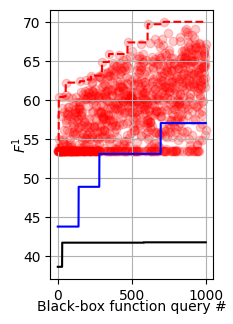

0.0
0.0


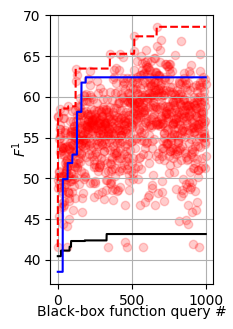

In [9]:
sensorNums = [5, 7, 9, 11, 13, 15]
epsilons = [0.25, 0.5, 1]

styles = [['', '--'],
           ['', ':'],
           ['', '-.'],
           ['o', '--'], 
           ['o', ':'],
           ['o', '-.']]
        
colors = ['r', 'b', 'g', 'c', 'm', 'darkorange']

for e in epsilons:
    if testbed == 'Testbed1/':
        if e == 0.25: 
            sn = 9
            gsn = -1
            
        elif e == 0.5:
            sn = 7
            gsn = -1
            
        elif e == 1:
            sn = 9
            gsn = 15
    elif testbed == 'Testbed2/':
        if e == 0.25: 
            sn = 11
            gsn = -1
            
        elif e == 0.5:
            sn = 11
            gsn = 7
            
        elif e == 1:
            sn = 13
            gsn = 11

    BOnames = ['GA']
    fig, ax = plt.subplots(figsize=(2.1, 3.5))
    plt.grid()
    
    dn1 = 'GA (' + str(e) + ')'
    GA_Plotter_single(dn1, 
               linestyle = '-', 
               color = 'k',
               plotDataPoints = False)
    
    
    dn2 = 'BO (' + str(sn) + '-' + str(e) + ')'
    
    if gsn != -1:
        dn3 = 'G (' + str(gsn) + '-' + str(e) + ')'
        S = (((8 - e)**2) / (e**2))
        placed_sn = min(S, gsn)
        dr = int((S * placed_sn) - ((placed_sn * (placed_sn - 1)) / 2))
        dr = min(dr, 1000)

        Greedy_Plotter_single(dn3, 
                holdplot = True, 
                plotDataPoints = False,
                name = dn3, 
                e = e,
                linestyle = styles[0][1], 
                marker = styles[0][0],
                color = 'b',
                data_range = dr)
    
    
    BO_Plotter_best(dn2, 
            holdplot = True, 
            plotDataPoints = True,
            name = dn2, 
            e = e,
            linestyle = styles[0][1], 
            marker = styles[0][0],
            color = 'r')

    

    BOnames.append('BO ' + str(sn))

    #except:
    #    print('----- No data exist in directory: ' + dn2)

    
    # legend = plt.legend(['GA', 'Greedy ' + str(gsn), 'BO ' + str(sn)],ncol=4, prop={'size': 9}, loc = 'center left', handlelength = 1.5, bbox_to_anchor=(1, 0.5))
    # legend.get_frame().set_alpha(None)
    # legend.get_frame().set_facecolor((0, 0, 0, 0.1))
    
    # plt.grid()

    plt.show()

# Sensor Locations Animation

In [10]:
def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = cmap
    mycmap._init()
    
    def f(x):
        return np.clip(x**2,-1,1)
        # return x**2
    
    #mycmap._lut[:,-1] = np.linspace(0.7, 1, N+4)
    # mycmap._lut[:,-1] = np.logspace(0.0, 10, N+4, endpoint=False, base = np.e)

    
    mycmap._lut[:,-1] = np.linspace(0, 1, N + 4, endpoint=False)
    
    # mycmap._lut[:,-1] = np.linalg.norm(mycmap._lut[:,-1])
    # print(type(mycmap._lut[:,-1]))
    return mycmap


def HeatMap(data_x, data_y):
    mycmap = transparent_cmap(plt.cm.autumn)    
    heatmap, xedges, yedges = np.histogram2d(data_x, data_y, bins=100)
    extent = [0.2, 7.7, 0.6, 7.8]
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap = mycmap)
    
    # heatmap = heatmap, xedges, yedges = np.histogram2d(data_x, data_y, bins=[np.arange(0,400,5),np.arange(0,300,5)])
    # extent = [0.3, 8.2, 0.3, 8.2]
    # plt.imshow(heatmap.T, extent=extent, origin='lower', cmap = mycmap)
    
def HM(x1, x2):
  mycmap = transparent_cmap(plt.cm.autumn) 
  if testbed == 'Testbed1/':
    extent = [0.0, 8.0, 0.4, 8.0]

  elif testbed == 'Testbed2/':
    extent = [0.0, 5.2, 0.4, 8.0]

  from scipy.stats import gaussian_kde
  # plt.figure(figsize=(8, 10))

  # fit an array of size [Ndim, Nsamples]
  data = np.vstack([x1, x2])
  kde = gaussian_kde(data)

  # evaluate on a regular grid
  xgrid = np.linspace(min(x1), max(x1), 50);
  ygrid = np.linspace(min(x2), max(x2), 50);
  Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
  Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

  # Plot the result as an image
  plt.imshow(Z.reshape(Xgrid.shape),
            origin='lower', aspect='auto',
            extent=extent,
            cmap = mycmap)
  # cb = plt.colorbar()
  # cb.set_label("Occupants presence probability")

def get_sensor_locations(c, epsilon):
    import ast

    # THIS IS FOR (X, Y) CONFIGURATION SPACES
    coordinates = c.get_dictionary()
    
    Xs = []
    Ys = []
    Ts = []

    print(coordinates)

    # for i in range(1, int(len(coordinates.keys())/2)):
    #     Xs.append(coordinates['x'+str(i)] * epsilon)
    #     Ys.append(coordinates['y'+str(i)] * epsilon)
    
    for key in coordinates.keys():
        # print(coordinates[key])
        try:
            loc = ast.literal_eval(coordinates[key])
            Xs.append(loc[0])
            Ys.append(loc[1])

            #TODO: Handle different sensor types here:
            Ts.append(1)
            
        except:
            continue

    # Xs.append(Xs[0])
    # Ys.append(Ys[0])


    for k in range(len(Xs)):
        for i in range(len(Xs)):
            for j in range(i+1, len(Xs)):
                if Xs[i] == Xs[j] and Ys[i] == Ys[j]:
                    Xs[i] -= 0.2
                    # print(Xs[i])

    for k in range(len(Xs)):
        for i in range(len(Xs)):
            for j in range(i+1, len(Xs)):
                if Xs[i] == Xs[j] and Ys[i] == Ys[j]:
                    Xs[i] -= 0.2
                    # print(Xs[i])
                        

    print(Xs)
    return Xs, Ys, Ts

    # THIS IS FOR X, Y, T_O CONFIGURATION SPACES
    '''
    # print(c)
    print(epsilon)
    coordinates = c.get_dictionary()

    Xs = []
    Ys = []
    Ts = []
    
    [str(item/255.) if item > 1 else 'r' for item in Ts]
    
    for key in coordinates.keys():
        if 'object' in key:
            Xs.append(float(coordinates[key].split(',')[0]))
            Ys.append(float(coordinates[key].split(',')[1]))
        
    for key in coordinates.keys():
        if 't_o' in key:
            Ts.append(coordinates[key])
        
    for key in coordinates.keys():
        if 'x' in key:
            Xs.append(coordinates[key])
            Ts.append(1)
        
    for key in coordinates.keys():
        if 'y' in key:
            Ys.append(coordinates[key])
    '''
    '''
        if 'x' in key:
            # print(coordinates[key])
            Xs.append(coordinates[key] / epsilon)
            
        elif 'y' in key:
            Ys.append(coordinates[key] / epsilon)

        elif 'object' in key:
            Xs.append(float(coordinates[key].split(',')[0]))
            Ys.append(float(coordinates[key].split(',')[1]))
            
        elif 't_' in key:
            Ts.append(coordinates[key])
            
    return Xs, Ys, Ts
    '''

def get_traces(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith(".csv"): 
            data.append(pd.read_csv(os.path.join(directory, filename)))

        else:
            continue

    data_x = []
    data_y = []

    for df in data:
        # data_x = data_x + list(np.clip(list(df.x), 0.5, 7.5))
        # data_y = data_y + list(np.clip(list(df.y), 0.5, 7.5))
        data_x = data_x + list(df.x)
        data_y = data_y + list(df.y)
        
    # print('X is: ', data_x)
    # print('Y is: ', data_y)
    
    return data_x, data_y

In [36]:
def plot_sensor_locations(path, sensorNum, epsilon, method, filenumber):
    import SensorOptimizers.BayesianOptimization as bo
    import SensorOptimizers.GeneticAlgorithm as ga
    
    if method == 'BO':            
        results = boi.read_files(path + '/BO (' + 
                                 str(sensorNum) + 
                                 '-' + 
                                 str(epsilon) + ')')
        result = results[filenumber]
        data = [100 - p for p in result.perfs]
        title = 'BO performance: ' + str(max(data))
        
    elif method == 'G':
        results = boi.read_files(path + '/G (' + 
                                 str(sensorNum) + 
                                 '-' + 
                                 str(epsilon) + ')')
        
        best_result = -1
        best_index = -1
        # result = results[filenumber]
        for index, result in enumerate(results):
        
            data = []
            sensor_num = []

            result_for_print = result

            for generation in result_for_print:
                for chromosome in generation:
                    try:
                        data.append(chromosome[0][0])
                    except:
                        pass
            if (max(data) > best_result):
                best_index = index
                best_result = max(data)
 
        title = 'Greedy performance: ' + str(best_result)
        
    elif method == 'GA':
        results = boi.read_files(path + '/GA (' + 
                                 str(epsilon) + 
                                 ')')
        best_result = -1
        best_index = -1
        result = results[filenumber]
        
        # for index, result in enumerate(results):
        
        data = []
        sensor_num = []

        result_for_print = result

        for generation in result_for_print:
            for chromosome in generation:
                try:
                    data.append(chromosome[0][0])
                except:
                    pass
        # if (max(data) >= best_result):
        best_index = np.argmax(data)
        best_result = max(data)

        title = 'GA performance: ' + str(best_result)
        
    configurations = []
    accuracy = []
    last = 0
    
    if method == 'BO':
        data = [100 - p for p in result.perfs]
        losses = list(data)
        n_calls = len(losses)
        maxs = [np.max(losses[:i]) for i in range(1, n_calls + 1)]

        for i in range(len(maxs)):
            if (maxs[i] != last):
                last = maxs[i]
                configurations.append(i)
                accuracy.append(maxs[i])

        configs = result.get_all_configs()
        i = -1
        config_index = configurations[-1]
        c = configs[config_index]
        
        # matrix, labels = bo.get_confusion_matrix(c)
        matrix, labels = [], []
        
        
        Xs, Ys, Ts = get_sensor_locations(c, epsilon)
        
        
    elif method == 'GA' or method == 'G':
        print(best_index)
        # result = results[best_index]
        _, configurations = result
        config = configurations[-1]
        # print(config)
        data = config.GetSensorLocations()[0]
        
        # matrix, labels = ga.get_confusion_matrix(config)
        matrix, labels = [], []
        
        A = [x for x in zip(*data)]  
        Xs, Ys = A[0], A[1]

    agent_x, agent_y = get_traces(testbed + "/Agent Trace Files ROS")
    #for i in range(len(Xs)):

    if testbed == 'Testbed1/':
        xlim=(-0.2, 8.2)
        ylim=(-0.3, 8.2)

    elif testbed == 'Testbed2/':
        xlim=(-0.2, 5.2)
        ylim=(-0.3, 8.2)

    if method == 'GA':
        plt.scatter(Xs, Ys, marker = 7, color='b')
        
    elif method == 'G':
        plt.scatter(Xs, Ys, marker = ">", color='g')

    elif method == 'BO':
        # colors = [str(item/255.) if item > 1 else 'r' for item in Ts]
        
        # plt.scatter([xx * epsilon for xx in Xs], [yy * epsilon for yy in Ys], marker = "^", color = 'r')
        plt.scatter(Xs, Ys, marker = "^", color = 'r')
        
        Cs = {3: 'b', 4: 'm', 5: 'k'}
        
        '''FOR DIFFERENT SENSOR TYPES
        for i in range(len(Xs)):
            if Ts[i] == 1:
                plt.scatter(Xs[i], Ys[i], marker = 6, color = 'r')
                
            else:
                print(Xs[i])
                print(Ys[i])
                plt.scatter(Xs[i], Ys[i], marker = "o", color = Cs[Ts[i]])
        '''    
        
        
        '''
        A = list([*zip(Xs, Ys)])
        print(type(A[0]))
        res = list(set([ele for ele in A if A.count(ele) > 1]))
        if len(res) > 0:
            for p in res:
                plt.scatter(p[1] + 0.15, p[0], marker = 6, color='r', label='_nolegend_')
        '''

    plt.xlim(*xlim)
    plt.ylim(*ylim)

    img = plt.imread(testbed + "/case study (IFC).png")
    if testbed == 'Testbed1/':
        im = plt.imshow(np.flipud(img), origin='upper', extent=[-0.2, 8.2, -0.2, 8.2])
        HM(agent_x, agent_y)
        ax.set_xlim([-0.22, 8.22])
        ax.set_ylim([-0.22, 8.22])

    if testbed == 'Testbed2/':
        im = plt.imshow(np.flipud(img), origin='upper', extent=[-0.2, 5.5, -0.2, 8.2])
        HM(agent_x, agent_y)
        ax.set_xlim([-0.22, 5.42])
        ax.set_ylim([-0.22, 8.22])
        ax.set_xticks(range(0, 6))
        ax.set_yticks(range(0, 9))
    
    plt.gca().invert_yaxis()

    # display.clear_output(wait=True)
    # display.display(pl.gcf())
    return title, matrix, labels

****************************************************************************************************
epsilon: 0.25
****************************************************************************************************
{'ls1': '[5.25, 7.75]', 'ls10': '[5.25, 2.25]', 'ls11': '[1.0, 2.75]', 'ls2': '[5.0, 3.5]', 'ls3': '[5.25, 5.5]', 'ls4': '[1.5, 4.5]', 'ls5': '[1.75, 6.5]', 'ls6': '[1.5, 5.0]', 'ls7': '[4.25, 6.25]', 'ls8': '[0.25, 5.5]', 'ls9': '[3.5, 7.75]', 'ls_t1': 1, 'ls_t10': 1, 'ls_t11': 1, 'ls_t2': 1, 'ls_t3': 1, 'ls_t4': 1, 'ls_t5': 1, 'ls_t6': 1, 'ls_t7': 1, 'ls_t8': 1, 'ls_t9': 1}
[5.25, 5.25, 1.0, 5.0, 5.25, 1.5, 1.75, 1.5, 4.25, 0.25, 3.5]
96
GA performance: 41.554768577187886 : BO performance: 73.98891037438379


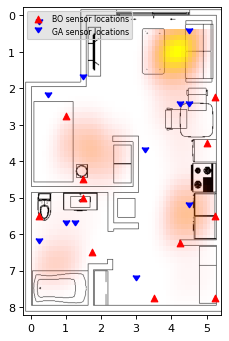

****************************************************************************************************
epsilon: 0.5
****************************************************************************************************
{'l1': '[4.5, 2.5]', 'l10': '[5.0, 3.0]', 'l11': '[0.5, 6.5]', 'l2': '[0.5, 6.5]', 'l3': '[4.5, 6.5]', 'l4': '[0.5, 5.0]', 'l5': '[2.0, 0.5]', 'l6': '[3.0, 2.5]', 'l7': '[2.5, 3.5]', 'l8': '[4.5, 0.5]', 'l9': '[5.0, 5.5]'}
[4.5, 5.0, 0.3, 0.5, 4.5, 0.5, 2.0, 3.0, 2.5, 4.5, 5.0]
3
1
Greedy performance: 63.832060585494865 : BO performance: 68.08173806602144


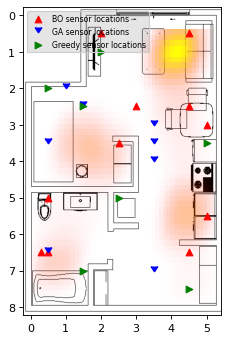

****************************************************************************************************
epsilon: 1
****************************************************************************************************
{'l1': '[5, 3]', 'l10': '[5, 7]', 'l11': '[5, 6]', 'l12': '[5, 4]', 'l13': '[1, 2]', 'l2': '[2, 5]', 'l3': '[3, 1]', 'l4': '[3, 1]', 'l5': '[1, 6]', 'l6': '[5, 7]', 'l7': '[5, 6]', 'l8': '[2, 3]', 'l9': '[2, 4]'}
[5, 4.8, 4.8, 5, 1, 2, 2.8, 3, 1, 5, 5, 2, 2]
33
4
Greedy performance: 66.01253453795086 : BO performance: 68.15101191667338


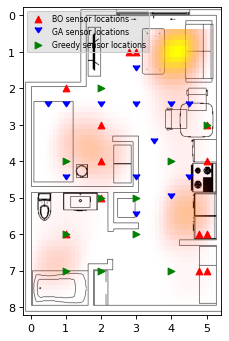

In [54]:
# from turtle import position


for epsilon in [0.25, 0.5, 1]:
    print('*' * 100)
    print('epsilon: ' + str(epsilon))
    print('*' * 100)

    if testbed == 'Testbed1/':
        #### Chooses the best sensor numbers for each epsilon
        if epsilon == 0.25: sensorNum = 9
        if epsilon == 0.5: sensorNum = 9
        if epsilon == 1: sensorNum = 5
            
        if epsilon == 0.25: sensorNumG = 5
        if epsilon == 0.5: sensorNumG = 11
        if epsilon == 1: sensorNumG = 7
        
        for filenumber1 in [0, 1, 2, 3, 4]:
            if epsilon == 0.25: filenumber1 = 0
            elif epsilon == 0.5: filenumber1 = 0
            elif epsilon == 1: filenumber1 = 1
                
            if epsilon == 0.25: filenumber1G = 1
            elif epsilon == 0.5: filenumber1G = 4
            elif epsilon == 1: filenumber1G = 1
        ####

    elif testbed == 'Testbed2/':
        #### Chooses the best sensor numbers for each epsilon
        if epsilon == 0.25: sensorNum = 11
        if epsilon == 0.5: sensorNum = 11
        if epsilon == 1: sensorNum = 13
            
        if epsilon == 0.25: sensorNumG = -1
        if epsilon == 0.5: sensorNumG = 7
        if epsilon == 1: sensorNumG = 11

        if epsilon == 0.25: filenumber1 = 2
        elif epsilon == 0.5: filenumber1 = 4
        elif epsilon == 1: filenumber1 = 3
            
        if epsilon == 0.25: filenumber1G = 1
        elif epsilon == 0.5: filenumber1G = 1
        elif epsilon == 1: filenumber1G = 1
            
        if epsilon == 0.25: filenumberGA = 0
        elif epsilon == 0.5: filenumberGA = 2
        elif epsilon == 1: filenumberGA = 1
        ####

    import matplotlib.pyplot as plt

    if testbed == 'Testbed1/':
        fig, ax = plt.subplots(figsize=(5.0, 5.0), dpi=80)
        

    elif testbed == 'Testbed2/':
        fig, ax = plt.subplots(figsize=(3.2, 5.0), dpi=80)

    
    title, matrix, labels = plot_sensor_locations(results_directory, sensorNum, epsilon, 'BO', filenumber1)
    bo_title = title
    bo_matrix = matrix
    bo_labels = labels

    title, matrix, labels = plot_sensor_locations(results_directory, sensorNum, epsilon, 'GA', filenumberGA)
    ga_title = title
    ga_matrix = matrix
    ga_labels = labels
    
    if sensorNumG != -1:
        title, matrix, labels = plot_sensor_locations(results_directory, sensorNumG, epsilon, 'G', None)
        ga_title = title
        ga_matrix = matrix
        ga_labels = labels
    

    legend = plt.legend(['BO sensor locations', 'GA sensor locations', 'Greedy sensor locations'], prop={'size': 7}, loc = 'upper left')
    legend.get_frame().set_alpha(None)
    legend.get_frame().set_facecolor((0, 0, 0, 0.1))

    print(ga_title + " : " + bo_title)
    plt.show()
    

In [ ]:
coordinates = {'ls1': '[2.0, 3.75]', 'ls10': '[5.25, 3.5]', 'ls11': '[0.5, 6.25]', 'ls2': '[0.25, 5.75]', 'ls3': '[5.0, 6.0]', 'ls4': '[0.25, 7.25]', 'ls5': '[2.25, 5.25]', 'ls6': '[1.25, 6.75]', 'ls7': '[5.25, 7.5]', 'ls8': '[4.5, 3.0]', 'ls9': '[4.0, 6.25]', 'ls_t1': 1, 'ls_t10': 1, 'ls_t11': 1, 'ls_t2': 1, 'ls_t3': 1, 'ls_t4': 1, 'ls_t5': 1, 'ls_t6': 1, 'ls_t7': 1, 'ls_t8': 1, 'ls_t9': 1}

In [ ]:
for c in coordinates.keys():
    try:
        print(ast.literal_eval(coordinates[c]))
    except:
        continue

In [ ]:
Xs = []
Ys = []
for i in range(1, int(len(coordinates.keys())/2)):
    Xs.append(coordinates['x'+str(i)])
    Ys.append(coordinates['y'+str(i)])

In [ ]:
Xs

In [ ]:
Ys

In [ ]:
labels = ['Undress', 
          'Take a shower', 
          'Dress', 
          'Iron', 
          'Sit and work with tablet', 
          'Exercise', 
          'Use toilet',
          'Wash hands', 
          'Watch TV', 
          'Grab ingredients from fridge',
          'Make tea', 
          'Toast breads', 
          'Grab utensils',
          'Fry eggs using stove', 
          'Eat', 
          'Take medicine',
          'Wipe dining table', 
          'Clean kitchen', 
          'Wash dishes', 
          'Grab the broom from storage',
          'Broom', 
          'Return the broom', 
          'Sleep']


from sklearn.metrics import confusion_matrix
import seaborn as sns

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = bo_matrix[0]

# cm = np.nan_to_num(cm)



for m in range(1, len(bo_matrix)):
    cm += np.nan_to_num(bo_matrix[m])

cm = cm/5

normed_c = (cm.T / cm.astype(np.float).sum(axis=1)).T
cmn = normed_c

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cmn, cmap = plt.cm.viridis, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels, linewidths=1, linecolor='grey')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=True)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = ga_matrix[4]

# for m in range(1, len(ga_matrix)):
#     cm += ga_matrix[m]
    
    
# cm = cm/5

    
# for m in bo_matrix:    
normed_c = (cm.T / cm.astype(np.float).sum(axis=1)).T

cmn = normed_c
# cmn = cm

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cmn, cmap = plt.cm.viridis, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels, linewidths=1, linecolor='grey')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=True)

# Statistics

In [ ]:


statistic = pd.DataFrame()
pvalue = pd.DataFrame()

def compare(data, minVal, maxVal = None): 
  data_compare = pd.DataFrame()

  for i1, v1 in pvalue.items():
    for i2, v2 in pvalue.items():
      if maxVal == None:
        if data.loc[i1,i2] < minVal:
          data_compare.loc[i1,i2] = 1
        else:
          data_compare.loc[i1,i2] = 0

      if maxVal != None:
        if data.loc[i1,i2] < minVal or data.loc[i1,i2] > maxVal:
          data_compare.loc[i1,i2] = 1
        else:
          data_compare.loc[i1,i2] = 0
  return data_compare


mean_std = pd.DataFrame()
for key1 in accuracies:
    for key2 in accuracies:
        
        # print(np.std(accuracies[key1]))
        # print(np.mean(accuracies[key1]))
        
        mean_std.loc[key1, 'Mean'] = np.mean(accuracies[key1])
        mean_std.loc[key1, 'STD'] = np.std(accuracies[key1])
                                             
        
        t = ttest_ind_from_stats(mean1=np.mean(accuracies[key1]), std1=np.std(accuracies[key1]), nobs1=5,
                                 mean2=np.mean(accuracies[key2]), std2=np.std(accuracies[key2]), nobs2=5)
        
        statistic.loc[key1,key2] = t.statistic
        pvalue.loc[key1,key2] = t.pvalue
        

In [ ]:
accuracies

In [ ]:
pvalue

In [ ]:
import seaborn as sns

compare_pvalue = compare(pvalue, 0.05)

for epsilon in ['0.5', '1', '2']:
    sn = '1'

    rows = ['GA (' + epsilon + ')',
            'BO (5' '-' + epsilon + ')',
            'BO (7' + '-' + epsilon + ')',
            'BO (9' + '-' + epsilon + ')',
            'BO (11' + '-' + epsilon + ')',
            'BO (13' + '-' + epsilon + ')',
            'BO (15' + '-' + epsilon + ')',
           ]

    df = compare_pvalue.filter(like=epsilon + ')').loc[rows]
    sns.heatmap(df, annot=True, cmap="binary")
    plt.show()

In [ ]:
(64.9 + 66.6 + 67.8 + 68.4 + 67.7 + 67.3) / 6

In [ ]:
(0.6 + 0.6 + 1 + 0.9 + 1 + 0.8) / 6

In [ ]:
(61.0 + 63.4 + 64.5  + 65.9  + 67.4 + 67.4) / 6

In [ ]:
(0.8 + 0.4 + 0.7 + 1.1 + 1.1 + 0.9) / 6

In [ ]:
(57.4  + 58.7 + 59.5 + 62.6 + 60.6 + 60.7) / 6

In [ ]:
(0.8 + 1 + 0.5 + 0.3 + 0.8 + 0.7) / 6

In [ ]:
141+140+139+138+137+136+135+134+133

In [ ]:
sns.heatmap(df, annot=True, cmap="binary")

In [ ]:
sns.heatmap(df2, annot=True, cmap="binary")

In [ ]:
sns.heatmap(df3, annot=True, cmap="binary")

In [ ]:
compare_pvalue

In [ ]:
accuracies.keys()

In [ ]:
BO05 = [72.4, 76.5, 73.4, 74.1, 75.2, 75.3]
BO1 = [68.4, 72.8, 75.3, 71.3, 73.2, 70.7]
BO2 = [58.6, 55.4, 55.5, 54.7, 56.8, 57.3]

print(np.mean(BO05))
print(np.std(BO05))
print('---')
print(np.mean(BO1))
print(np.std(BO1))
print('---')
print(np.mean(BO2))
print(np.std(BO2))

ttest_ind_from_stats(mean1=np.mean(BO05), std1=np.std(BO05), nobs1=5,
                     mean2=np.mean(BO1),  std2=np.std(BO1), nobs2=5)

In [ ]:
ttest_ind_from_stats(mean1=np.mean(BO05), std1=np.std(BO05), nobs1=5,
                     mean2=np.mean(BO2),  std2=np.std(BO2), nobs2=5)

In [ ]:
ttest_ind_from_stats(mean1=np.mean(BO1), std1=np.std(BO1), nobs1=5,
                     mean2=np.mean(BO2),  std2=np.std(BO2), nobs2=5)

In [ ]:
A = [1,2]

In [ ]:
A = str(A)

In [ ]:
import ast

In [ ]:
res = ast.literal_eval(A)

In [ ]:
res

In [ ]:
type(res[1])